In [21]:
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, LSTM, Dense, Conv1D, MaxPooling1D, Flatten, LeakyReLU, Input, Concatenate
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd

In [3]:
TRAIN_SET = '../ptb_train_set.pickle'
TEST_SET = '../ptb_test_set.pickle'

with open(TEST_SET, 'rb') as file:
    test_set = pickle.load(file)
    x_test = test_set['x']
    y_test = test_set['y']

with open(TRAIN_SET, 'rb') as file:
    train_set = pickle.load(file)
    x_train = train_set['x']
    y_train = train_set['y']
    
x_train_mlp = x_train
x_test_mlp = x_test
    
x_train = tf.expand_dims(x_train, axis=2)
x_test = tf.expand_dims(x_test, axis=2)

In [4]:
print(x_train.shape)
print(y_train.shape)

(13097, 187, 1)
(13097,)


In [5]:
CNN_model = Sequential()
CNN_model.add(Conv1D(5, kernel_size=3, strides=1, input_shape=x_train.shape[1:]))
CNN_model.add(LeakyReLU())
CNN_model.add(MaxPooling1D(pool_size=2, strides=2))
CNN_model.add(Conv1D(10, kernel_size=4, strides=1))
CNN_model.add(LeakyReLU())
CNN_model.add(MaxPooling1D(pool_size=2, strides=2))
CNN_model.add(Conv1D(20, kernel_size=4, strides=1))
CNN_model.add(LeakyReLU())
CNN_model.add(MaxPooling1D(pool_size=2, strides=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(30))
CNN_model.add(LeakyReLU())
CNN_model.add(Dense(20))
CNN_model.add(LeakyReLU())
CNN_model.add(Dense(1, activation="sigmoid"))
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 185, 5)            20        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 185, 5)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 92, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 89, 10)            210       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 89, 10)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 44, 10)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 20)            8

In [6]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
CNN_model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
CNN_history = CNN_model.fit(x_train, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20
205/205 [==============================] - 2s 8ms/step - loss: 0.5477 - accuracy: 0.7308 - val_loss: 0.4234 - val_accuracy: 0.7704
Epoch 2/20
205/205 [==============================] - 1s 7ms/step - loss: 0.3925 - accuracy: 0.8017 - val_loss: 0.3637 - val_accuracy: 0.8481
Epoch 3/20
205/205 [==============================] - 1s 7ms/step - loss: 0.3336 - accuracy: 0.8513 - val_loss: 0.3283 - val_accuracy: 0.8646
Epoch 4/20
205/205 [==============================] - 1s 7ms/step - loss: 0.3031 - accuracy: 0.8733 - val_loss: 0.3075 - val_accuracy: 0.8770
Epoch 5/20
205/205 [==============================] - 1s 7ms/step - loss: 0.2708 - accuracy: 0.8845 - val_loss: 0.2668 - val_accuracy: 0.9017
Epoch 6/20
205/205 [==============================] - 1s 7ms/step - loss: 0.2265 - accuracy: 0.9094 - val_loss: 0.2252 - val_accuracy: 0.9189
Epoch 7/20
205/205 [==============================] - 1s 7ms/step - loss: 0.2048 - accuracy: 0.9213 - val_loss: 0.2195 - val_accuracy: 0.9182
Epoch 

In [8]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(64, input_shape=(187, 1)))
LSTM_model.add(Dense(128, activation='relu'))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(Dense(1, activation='sigmoid'))

In [9]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
LSTM_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 25,345
Trainable params: 25,345
Non-trainable params: 0
_________________________________________________________________


In [10]:
LSTM_history = LSTM_model.fit(x_train, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test, y_test))

Epoch 1/20
205/205 [==============================] - 17s 73ms/step - loss: 0.6188 - accuracy: 0.7091 - val_loss: 0.5898 - val_accuracy: 0.7230
Epoch 2/20
205/205 [==============================] - 15s 72ms/step - loss: 0.5923 - accuracy: 0.7168 - val_loss: 0.5600 - val_accuracy: 0.7230
Epoch 3/20
205/205 [==============================] - 15s 71ms/step - loss: 0.5342 - accuracy: 0.7216 - val_loss: 0.5384 - val_accuracy: 0.7182
Epoch 4/20
205/205 [==============================] - 14s 68ms/step - loss: 0.5150 - accuracy: 0.7319 - val_loss: 0.5750 - val_accuracy: 0.7210
Epoch 5/20
205/205 [==============================] - 14s 70ms/step - loss: 0.5156 - accuracy: 0.7218 - val_loss: 0.5053 - val_accuracy: 0.7271
Epoch 6/20
205/205 [==============================] - 14s 67ms/step - loss: 0.4980 - accuracy: 0.7375 - val_loss: 0.4858 - val_accuracy: 0.7265
Epoch 7/20
205/205 [==============================] - 15s 75ms/step - loss: 0.4964 - accuracy: 0.7312 - val_loss: 0.4843 - val_accuracy:

In [14]:
MLP_model = Sequential()
MLP_model.add(Dense(5, input_shape=x_train_mlp.shape[1:]))
MLP_model.add(Dense(64, activation='relu'))
MLP_model.add(Dense(128, activation='relu'))
MLP_model.add(Dense(128, activation='relu'))
MLP_model.add(Dense(128, activation='relu'))
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(64, activation='relu'))
MLP_model.add(Flatten())
MLP_model.add(Dense(1, activation='sigmoid'))
MLP_model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 5)                 940       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_14 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [15]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
MLP_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


In [16]:
MLP_history = MLP_model.fit(x_train_mlp, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test_mlp, y_test),
              shuffle=True)

Epoch 1/20
205/205 [==============================] - 1s 2ms/step - loss: 0.5342 - accuracy: 0.7248 - val_loss: 0.3953 - val_accuracy: 0.8027
Epoch 2/20
205/205 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8167 - val_loss: 0.3756 - val_accuracy: 0.8220
Epoch 3/20
205/205 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8399 - val_loss: 0.3487 - val_accuracy: 0.8399
Epoch 4/20
205/205 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8584 - val_loss: 0.2924 - val_accuracy: 0.8749
Epoch 5/20
205/205 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8796 - val_loss: 0.2703 - val_accuracy: 0.8838
Epoch 6/20
205/205 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.8986 - val_loss: 0.2628 - val_accuracy: 0.8818
Epoch 7/20
205/205 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9086 - val_loss: 0.3073 - val_accuracy: 0.8667
Epoch 

In [23]:
CNN_model.save("CNN_PTB")
LSTM_model.save("LSTM_PTB")
MLP_model.save("MLP_PTB")

INFO:tensorflow:Assets written to: CNN_PTB\assets


INFO:tensorflow:Assets written to: LSTM_PTB\assets


INFO:tensorflow:Assets written to: LSTM_PTB\assets


INFO:tensorflow:Assets written to: MLP_PTB\assets


INFO:tensorflow:Assets written to: MLP_PTB\assets


In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
def plot_history(history):
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()
    
def plot_confusion(model, name):
    predictions = model.predict(x_test)
    matrix = confusion_matrix(y_test, np.round(predictions))
    df_cm = pd.DataFrame(matrix, range(2), range(2))
    plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) 
    labels = ["Normal", "Abnormal"]
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, xticklabels=labels, yticklabels=labels)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(name)
    plt.show()

def plot_confusion_mlp(model, name):
    predictions = model.predict(x_test_mlp)
    matrix = confusion_matrix(y_test, np.round(predictions))
    df_cm = pd.DataFrame(matrix, range(2), range(2))
    plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) 
    labels = ["Normal", "Abnormal"]
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, xticklabels=labels, yticklabels=labels)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(name)
    plt.show()

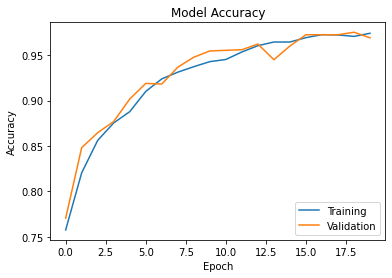

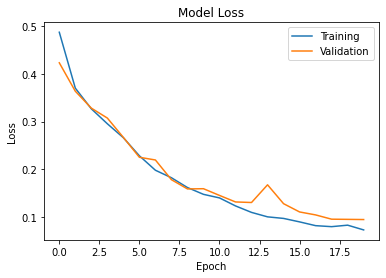

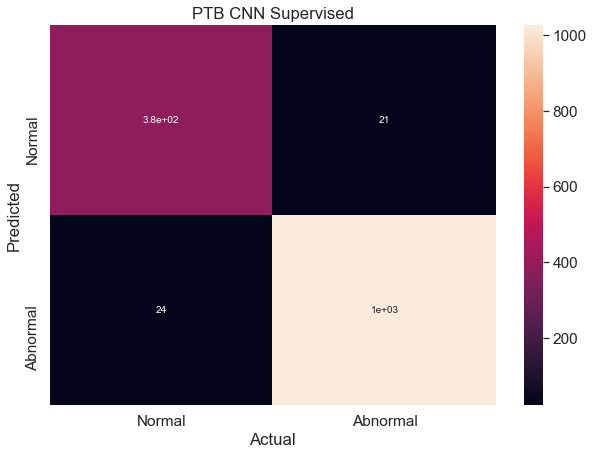

In [23]:
plot_history(CNN_history)
plot_confusion(CNN_model, "PTB CNN Supervised")

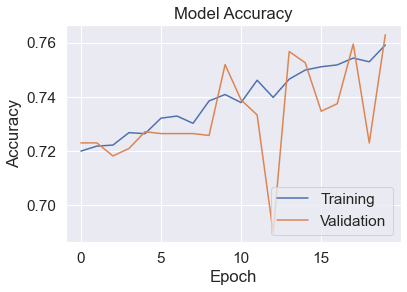

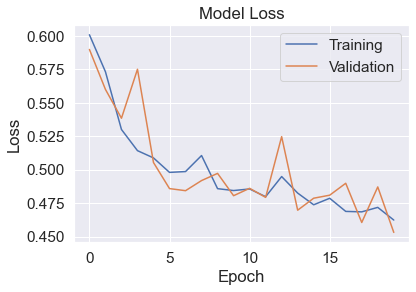

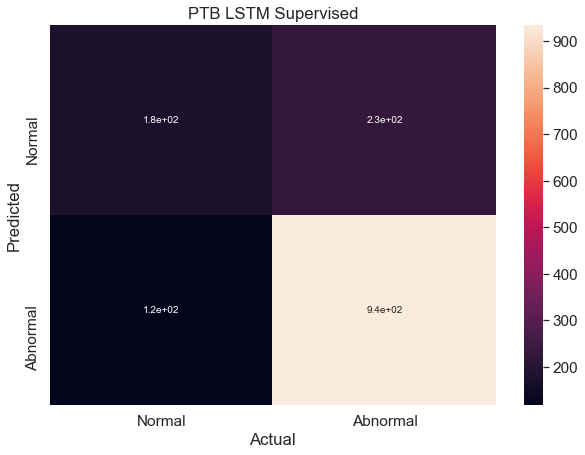

In [24]:
plot_history(LSTM_history)
plot_confusion(LSTM_model, "PTB LSTM Supervised")

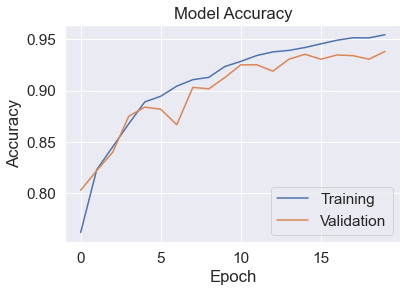

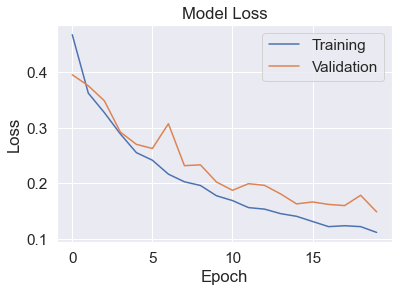

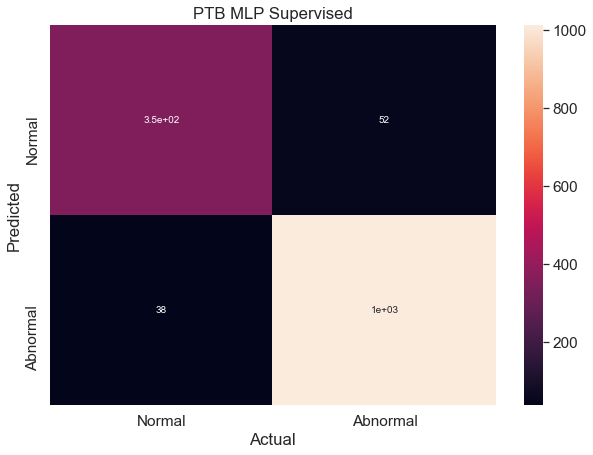

In [27]:
plot_history(MLP_history)
plot_confusion_mlp(MLP_model, "PTB MLP Supervised")